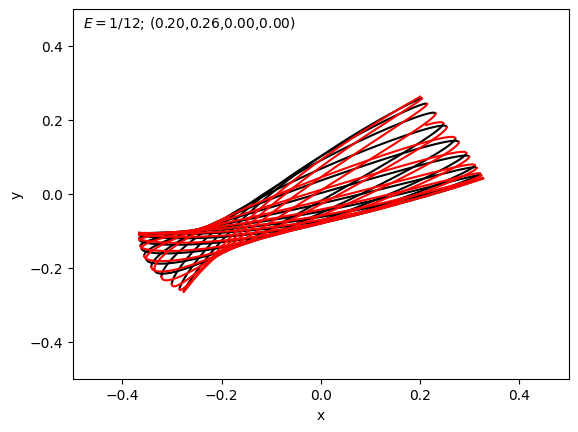

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import random

def dx(x,y,dy,e): # dx^2=(E-V)-dy^2
    return np.sqrt(2*e - x**2 - y**2 - 2*x**2*y + 2/3*y**3 - dy**2)

def equations(t, z):
    x, y, dxdt, dydt = z
    dx2dt2 = -x - 2*x*y
    dy2dt2 = -y - x**2 + y**2
    return [dxdt, dydt, dx2dt2, dy2dt2]

def create_sublists(data, mask):
    sublists = []
    sublist = []
    for i, (item, flag) in enumerate(zip(data, mask)):
        if flag:
            sublist.append(item)
        if not flag or i == len(data) - 1:
            if sublist:
                sublists.append(sublist)
                sublist = []
    return sublists

t_fin = 100
t_frames = 100000
t_span = np.linspace(0, t_fin, t_frames)

E = 1/12

x0 = random.uniform(-0.3,0.3)
y0 = random.uniform(-0.3,0.3)
# dy0 = random.uniform(-0.3,0.3)
# dx0 = random.choice([-1,1])*dx(x0,y0,dy0,E)
dx0 = 0
dy0 = 0

z0 = [x0,y0,dx0,dy0]  # Initial conditions

sol = solve_ivp(equations, [t_span[0], t_span[-1]], z0, t_eval=t_span)

mask = np.array([dx>0 for dx in sol.y[2]])

xp_list = create_sublists(sol.y[0],mask)
yp_list = create_sublists(sol.y[1],mask)

xn_list = create_sublists(sol.y[0],~mask)
yn_list = create_sublists(sol.y[1],~mask)

for x,y in zip(xp_list,yp_list):
    plt.plot(x,y,c='black')
for x,y in zip(xn_list,yn_list):
    plt.plot(x,y,c='red')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.text(-0.48,0.45,f'$E=1/12$; ({x0:.2f},{y0:.2f},{dx0:.2f},{dy0:.2f})')
plt.show()